<a href="https://colab.research.google.com/github/shoulderhu/colab-tensorflow-ipy/blob/master/NTPU_02_MLP_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: MLP for Classification
Now that we've learned about MLPs, let's implement a neural network for classification, using the classic MNIST dataset. 

The MNIST dataset contains 60,000 handwritten digits ('0' ~ '9') for the training set, and 10,000 for the testing set. Each handwritten digit is presented in grayscale, with an input size of 28x28. There's actually quite a lot of *pre-processing* done to the data samples; we'll not go into detail but you should know that pre-processing data is a lot of work, and is extremely important if you want your model to learn things.

## Installing Tensorflow 2.0
Tensorflow 2.0 is an improvement on Tensorflow 1 in many ways. The first beta version was just recently released (June 2019). Moving forward, its adoption is expected to grow, so to be up-to-date, we will be using Tensorflow 2.0 for our labs.

First, let's check what version of Tensorflow we are using on this notebook.

In [1]:
import tensorflow as tf

print(tf.__version__)

1.14.0


If your notebook is still on Tensorflow 1, run the following line to install Tensorflow 2.0 beta. Don't worry about how to set up your environment, we'll quickly explain when we have time.

In [2]:
!pip uninstall -y tensorflow

Uninstalling tensorflow-1.14.0:
  Successfully uninstalled tensorflow-1.14.0


In [3]:
!pip install -U tensorflow-gpu==2.0.0-beta1

     |████████████████████████████████| 348.9MB 59kB/s 
     |████████████████████████████████| 3.1MB 40.1MB/s 
     |████████████████████████████████| 501kB 52.1MB/s 


While it is installing, let's talk about what Keras is, and how it can help you.

Keras is a high-level DL API that makes building, training, evaluating neural networks easy. It is open source so there are many implementations. We will be using ```tf.keras``` (Keras implemented by the Tensorflow team). Since Keras calls the basic Tensorflow operations, it is definitely possible to build your neural networks using the basic Tensorflow operations. We won't go too much into depth on using low-level Tensorflow functions though, since this is an introductory course.

![alt text](https://drive.google.com/uc?id=1aEHxg19hKDGx9KEnmN7CP0YSJ6XKst20)

**Remember to restart the runtime so that the new Tensorflow takes effect.**

## Importing the necessary modules
Now that we've installed Tensorflow 2.0, let's import it and Keras, then check to see if the versions are correct.

In [4]:
# import and verify version
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

import numpy as np

1.14.0
2.2.4-tf


## Splitting the Data into Three Sets
As previously mentioned in the lecture, we want to split the data we have into three sets: training, validation, and testing.

Luckily, the MNIST dataset already has a training set and a test set. All we have to do is parcel out a validation set from the training set. Let's take the first 5000 samples as the validation.

In practice, the process of splitting the data into sets can be much more sophisticated. Think about a scenario where the number of data samples increase over time. Let's say you have some data on hand, but you know more data will be arriving regularly every week. How would you split your data set?

In [0]:
# load data
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Split into training and validation sets
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

print("Shape of the training set: {}".format(X_train_full.shape))
print("Datatype: {}".format(X_train_full.dtype))

11493376/11490434 [==============================] - 0s 0us/step
Shape of the training set: (60000, 28, 28)
Datatype: uint8


Okay, that's nice, but what does each data sample look like? For images, we can print them onto the screen by using .imshow().

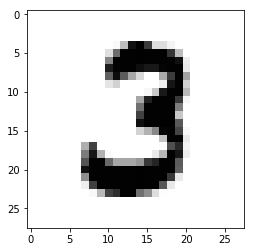

The label for X_train[54242] is: 3


In [0]:
plt.figure()
index = np.random.randint(0,54999)
plt.imshow(X_train[index], cmap="gray_r")
plt.show()

print("The label for X_train[{}] is: {}".format(index, y_train[index]))

## Building the Actual Neural Network
We'll be using what's called the ```Sequential``` API to implement our first MLP.

In [0]:
model = keras.models.Sequential()
## flatten is the same as reshape(-1, 1); -1 basically means "figure it out for me"
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

## alternatively:
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(20, activation="relu"),
#     keras.layers.Dense(20, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

Let's print out some information so we can see what the network looks like.

In [0]:
model.summary()

print(model.layers)
print(model.layers[2].name)
print(model.get_layer('dense_2').name)

weights, biases = model.layers[1].get_weights()
print(weights.shape)
print(weights)
print(biases.shape)
print(biases)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
[<tensorflow.python.keras.layers.core.Flatten object at 0x7f406870acc0>, <tensorflow.python.keras.layers.core.Dense object at 0x7f4065e03f60>, <tensorflow.python.keras.layers.core.Dense object at 0x7f4065e03198>, <tensorflow.python.keras.layers.core.

After we define the network, we will need to compile it. We need to specify the loss function, optimizer, and the metrics it uses to evaluate how well it performs.

Again, we call the function .fit() to start training.

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

W0708 06:25:06.745878 139915553908608 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 49us/sample - loss: 0.8846 - accuracy: 0.7356 - val_loss: 0.3904 - val_accuracy: 0.8902
Epoch 2/10
55000/55000 [==============================] - 3s 46us/sample - loss: 0.3662 - accuracy: 0.8942 - val_loss: 0.3096 - val_accuracy: 0.9130
Epoch 3/10
55000/55000 [==============================] - 3s 46us/sample - loss: 0.3074 - accuracy: 0.9110 - val_loss: 0.2677 - val_accuracy: 0.9246
Epoch 4/10
55000/55000 [==============================] - 3s 46us/sample - loss: 0.2720 - accuracy: 0.9214 - val_loss: 0.2390 - val_accuracy: 0.9352
Epoch 5/10
55000/55000 [==============================] - 2s 45us/sample - loss: 0.2459 - accuracy: 0.9291 - val_loss: 0.2210 - val_accuracy: 0.9380
Epoch 6/10
55000/55000 [==============================] - 2s 45us/sample - loss: 0.2267 - accuracy: 0.9349 - val_loss: 0.2080 - val_accuracy: 0.9400
Epoch 7/10
55000/55000 [==============================] -

## Evaluating the Network
Let's look at how well the model was trained.

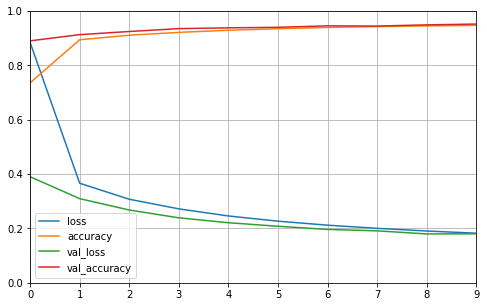

10000/10000 [==============================] - 0s 25us/sample - loss: 0.9954 - accuracy: 0.9371
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))

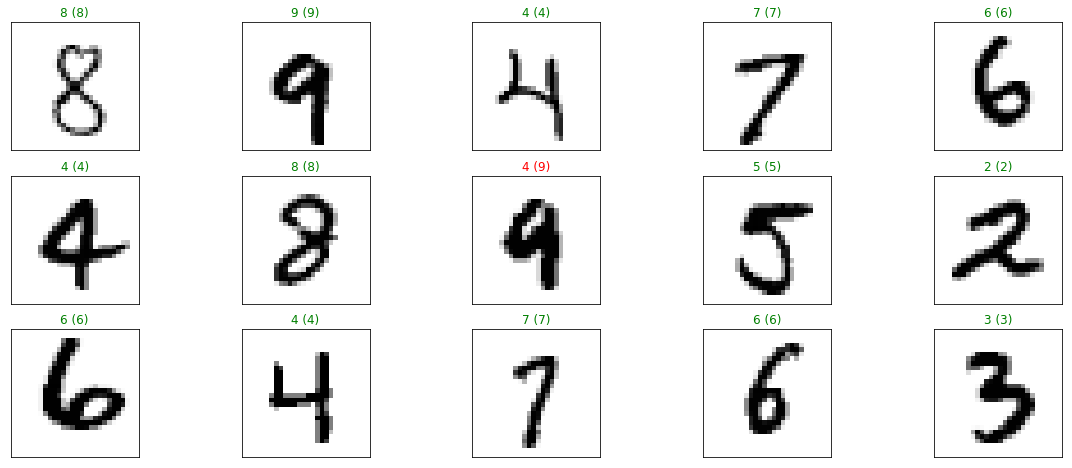

In [0]:
y_pred = model.predict(X_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]), cmap='gray_r')
    predict_index = np.argmax(y_pred[index])
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(predict_index, true_index),
                                  color=("green" if predict_index == true_index else "red"))

# Exercise: the Fashion MNIST Data Set

Try implementing the same network, but on a different data set: fashion MNIST.

Fashion MNIST is a more modern data set that uses ten different classes of clothing/accessories/shoes. With the demo above, you'll only need the following 2 lines of code. You don't have to run them right away; think about what you need to do and use code segments from the above demo.

In [0]:
# loading the fashion MNIST data
fashion_mnist = keras.datasets.fashion_mnist

# Name the classes because humans don't understand '0', '1', '2', etc.
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
# load data
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Split into training and validation sets
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

print("Shape of the training set: {}".format(X_train_full.shape))
print("Datatype: {}".format(X_train_full.dtype))

4423680/4422102 [==============================] - 0s 0us/step
Shape of the training set: (60000, 28, 28)
Datatype: uint8


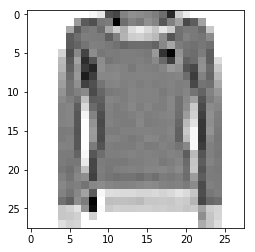

The label for X_train[31423] is: 2


In [8]:
plt.figure()
index = np.random.randint(0,54999)
plt.imshow(X_train[index], cmap="gray_r")
plt.show()

print("The label for X_train[{}] is: {}".format(index, y_train[index]))

In [9]:
model = keras.models.Sequential()
## flatten is the same as reshape(-1, 1); -1 basically means "figure it out for me"
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

## alternatively:
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(20, activation="relu"),
#     keras.layers.Dense(20, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

model.summary()

W0709 01:45:46.615249 140199254407040 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [10]:
print(model.layers)
print(model.layers[2].name)
print(model.get_layer('dense_2').name)

weights, biases = model.layers[1].get_weights()
print(weights.shape)
print(weights)
print(biases.shape)
print(biases)

[<tensorflow.python.keras.layers.core.Flatten object at 0x7f8260aa3ba8>, <tensorflow.python.keras.layers.core.Dense object at 0x7f8263793978>, <tensorflow.python.keras.layers.core.Dense object at 0x7f8260a86978>, <tensorflow.python.keras.layers.core.Dense object at 0x7f8260f0e898>]
dense_1
dense_2
(784, 20)
[[-0.02028704  0.04131241 -0.03215254 ... -0.08216835  0.0742725
  -0.06059901]
 [ 0.08329959 -0.00308327 -0.07402211 ...  0.02252983  0.0257218
   0.06687023]
 [-0.00064425  0.07665057  0.00592452 ...  0.06780776 -0.08074395
   0.03260894]
 ...
 [-0.08585742 -0.04474957 -0.07688387 ...  0.07583502  0.07946925
   0.03427995]
 [ 0.05495976  0.02635487  0.05558315 ...  0.04304039  0.05906461
   0.02883179]
 [-0.00765519 -0.0356035   0.06673633 ... -0.07848664  0.03585052
   0.00926377]]
(20,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
model.compile(loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 4s 75us/sample - loss: 0.8687 - acc: 0.7015 - val_loss: 0.5642 - val_acc: 0.8092
Epoch 2/20
55000/55000 [==============================] - 3s 62us/sample - loss: 0.5466 - acc: 0.8077 - val_loss: 0.4989 - val_acc: 0.8264
Epoch 3/20
55000/55000 [==============================] - 3s 63us/sample - loss: 0.4943 - acc: 0.8265 - val_loss: 0.4559 - val_acc: 0.8442
Epoch 4/20
55000/55000 [==============================] - 3s 62us/sample - loss: 0.4645 - acc: 0.8358 - val_loss: 0.4461 - val_acc: 0.8484
Epoch 5/20
55000/55000 [==============================] - 3s 62us/sample - loss: 0.4438 - acc: 0.8438 - val_loss: 0.4147 - val_acc: 0.8596
Epoch 6/20
55000/55000 [==============================] - 3s 62us/sample - loss: 0.4271 - acc: 0.8490 - val_loss: 0.4194 - val_acc: 0.8586
Epoch 7/20
55000/55000 [==============================] - 3s 62us/sample - loss: 0.4159 - acc: 0.8526 - val_loss: 0.4

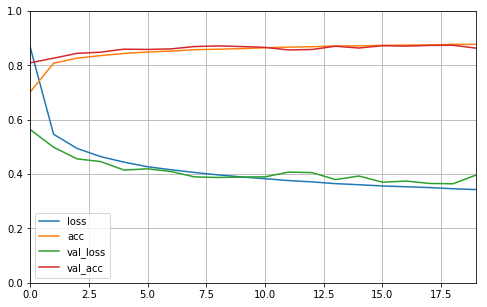

10000/10000 [==============================] - 0s 40us/sample - loss: 102.4397 - acc: 0.7832
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))

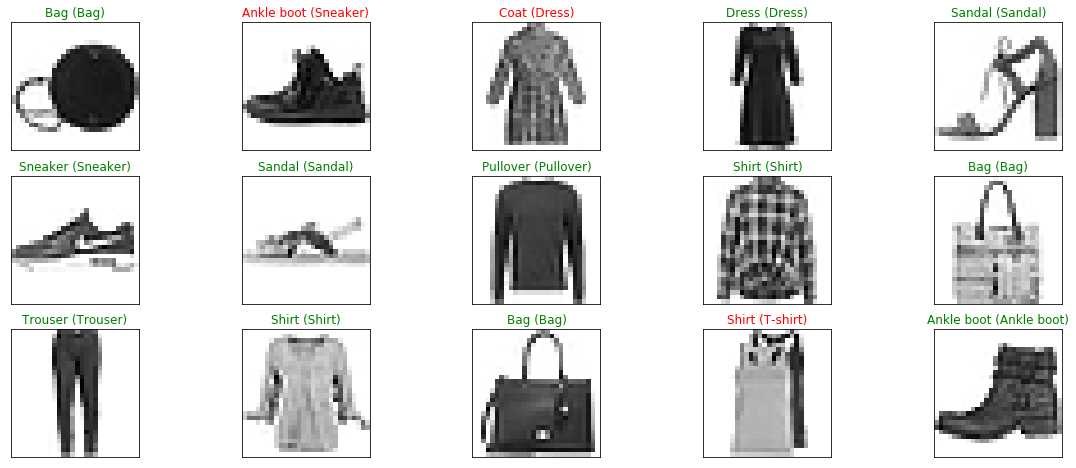

In [13]:
y_pred = model.predict(X_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]), cmap='gray_r')
    predict_index = np.argmax(y_pred[index])
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))